In [1]:
from google.colab import drive
ROOT = '/content/drive'
drive.mount(ROOT)

import pandas as pd
from pandas.io import gbq

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 33 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144379 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


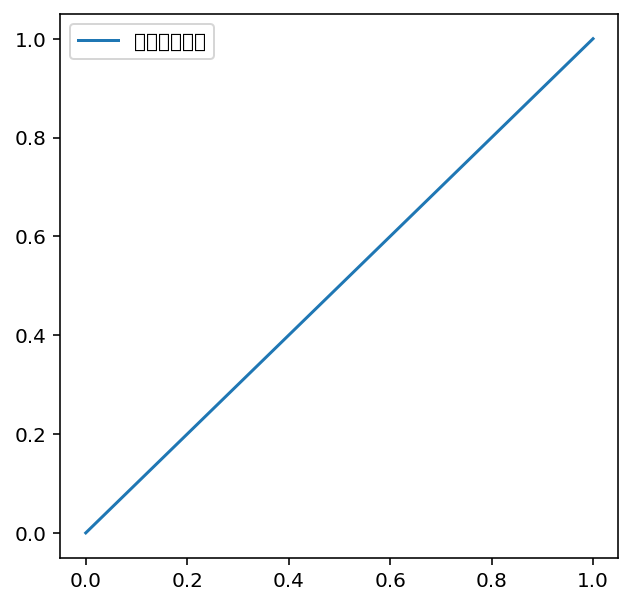

In [4]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [5]:
from os.path import join  

MY_GOOGLE_DRIVE_PATH = 'My Drive/Data_Corona'
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)
print(PROJECT_PATH)

/content/drive/My Drive/Data_Corona


In [6]:
%cd "{PROJECT_PATH}"
!ls

/content/drive/My Drive/Data_Corona
Case.csv	  Policy.csv	   SeoulFloating.csv  TimeGender.csv
PatientInfo.csv   Region.csv	   TimeAge.csv	      TimeProvince.csv
PatientRoute.csv  SearchTrend.csv  Time.csv	      Weather.csv


In [7]:
P001= pd.read_csv('/content/drive/My Drive/Data_Corona/PatientInfo.csv')

In [8]:
import time 

In [9]:
# import pandas as pd
# from pandas.io import gbq

# # import submission file in Google Drive
# submission = pd.read_csv('/content/drive/My Drive/submission.csv')

In [10]:
# submission.to_gbq(destination_table='jeju_data_ver1.submission', 
#                   project_id='eric-dacon', 
#                   if_exists='replace')

In [11]:
# # import submission file in Google Drive
# train = pd.read_csv('/content/drive/My Drive/201901-202003.csv')

# # Connect to Google Cloud API and Upload DataFrame
# train.to_gbq(destination_table='jeju_data_ver1.201901_202003_train', 
#                   project_id='eric-dacon', 
#                   if_exists='replace')

In [12]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [13]:
# train load from v 
%%time

from google.cloud import bigquery
from tabulate import tabulate
import pandas as pd

project_id = 'eric-dacon'
client = bigquery.Client(project=project_id)

train = client.query('''
  SELECT 
    * 
  FROM `eric-dacon.jeju_data_ver1.201901_202003_train` 
  LIMIT 200000
  ''').to_dataframe()

CPU times: user 5.87 s, sys: 586 ms, total: 6.45 s
Wall time: 22.1 s


In [14]:
# submission load from v 

%%time
project_id = 'eric-dacon'
client = bigquery.Client(project=project_id)

submission = client.query('''
  SELECT 
    * 
  FROM `eric-dacon.jeju_data_ver1.submission` 
  LIMIT 200000
  ''').to_dataframe()

CPU times: user 39.5 ms, sys: 75 µs, total: 39.5 ms
Wall time: 1.48 s


In [15]:
train.tail()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
199995,201908,전북,군산시,빵 및 과자류 소매업,경기,고양시 일산서구,20s,1,1,4,68900,11
199996,201908,전북,군산시,정기 항공 운송업,경기,고양시 덕양구,20s,2,1,18,1487404,18
199997,201908,전북,군산시,정기 항공 운송업,경기,성남시 수정구,20s,2,1,12,352900,9
199998,201908,전북,전주시 완산구,서양식 음식점업,경기,안산시 상록구,20s,2,1,4,76900,4
199999,201908,전북,전주시 완산구,한식 음식점업,경기,용인시 수지구,20s,2,1,41,596900,51


In [16]:
#01 REG_YYMM
train['REG_YYMM']
#샘플데이터 안에서는 2019년 1월부터 8월까지, 예측해야 하는 값은 2020년 4월 

0         201901
1         201903
2         201903
3         201903
4         201904
           ...  
199995    201908
199996    201908
199997    201908
199998    201908
199999    201908
Name: REG_YYMM, Length: 200000, dtype: int64

In [17]:
#02 CARD_SIDO_NM 
train['CARD_SIDO_NM'].unique()
# 총 11개의 시도 

array(['서울', '강원', '전북', '충북', '경기', '제주', '충남', '경북', '부산', '인천', '대구',
       '대전', '경남', '광주', '전남', '세종', '울산'], dtype=object)

In [18]:
#03 
train['STD_CLSS_NM'].value_counts().head(10)

체인화 편의점                  30082
한식 음식점업                  29090
비알콜 음료점업                 15473
피자 햄버거 샌드위치 및 유사 음식점업    13847
서양식 음식점업                 13510
슈퍼마켓                     12090
기타 대형 종합 소매업             11646
차량용 주유소 운영업               8427
빵 및 과자류 소매업               8133
중식 음식점업                   6334
Name: STD_CLSS_NM, dtype: int64

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


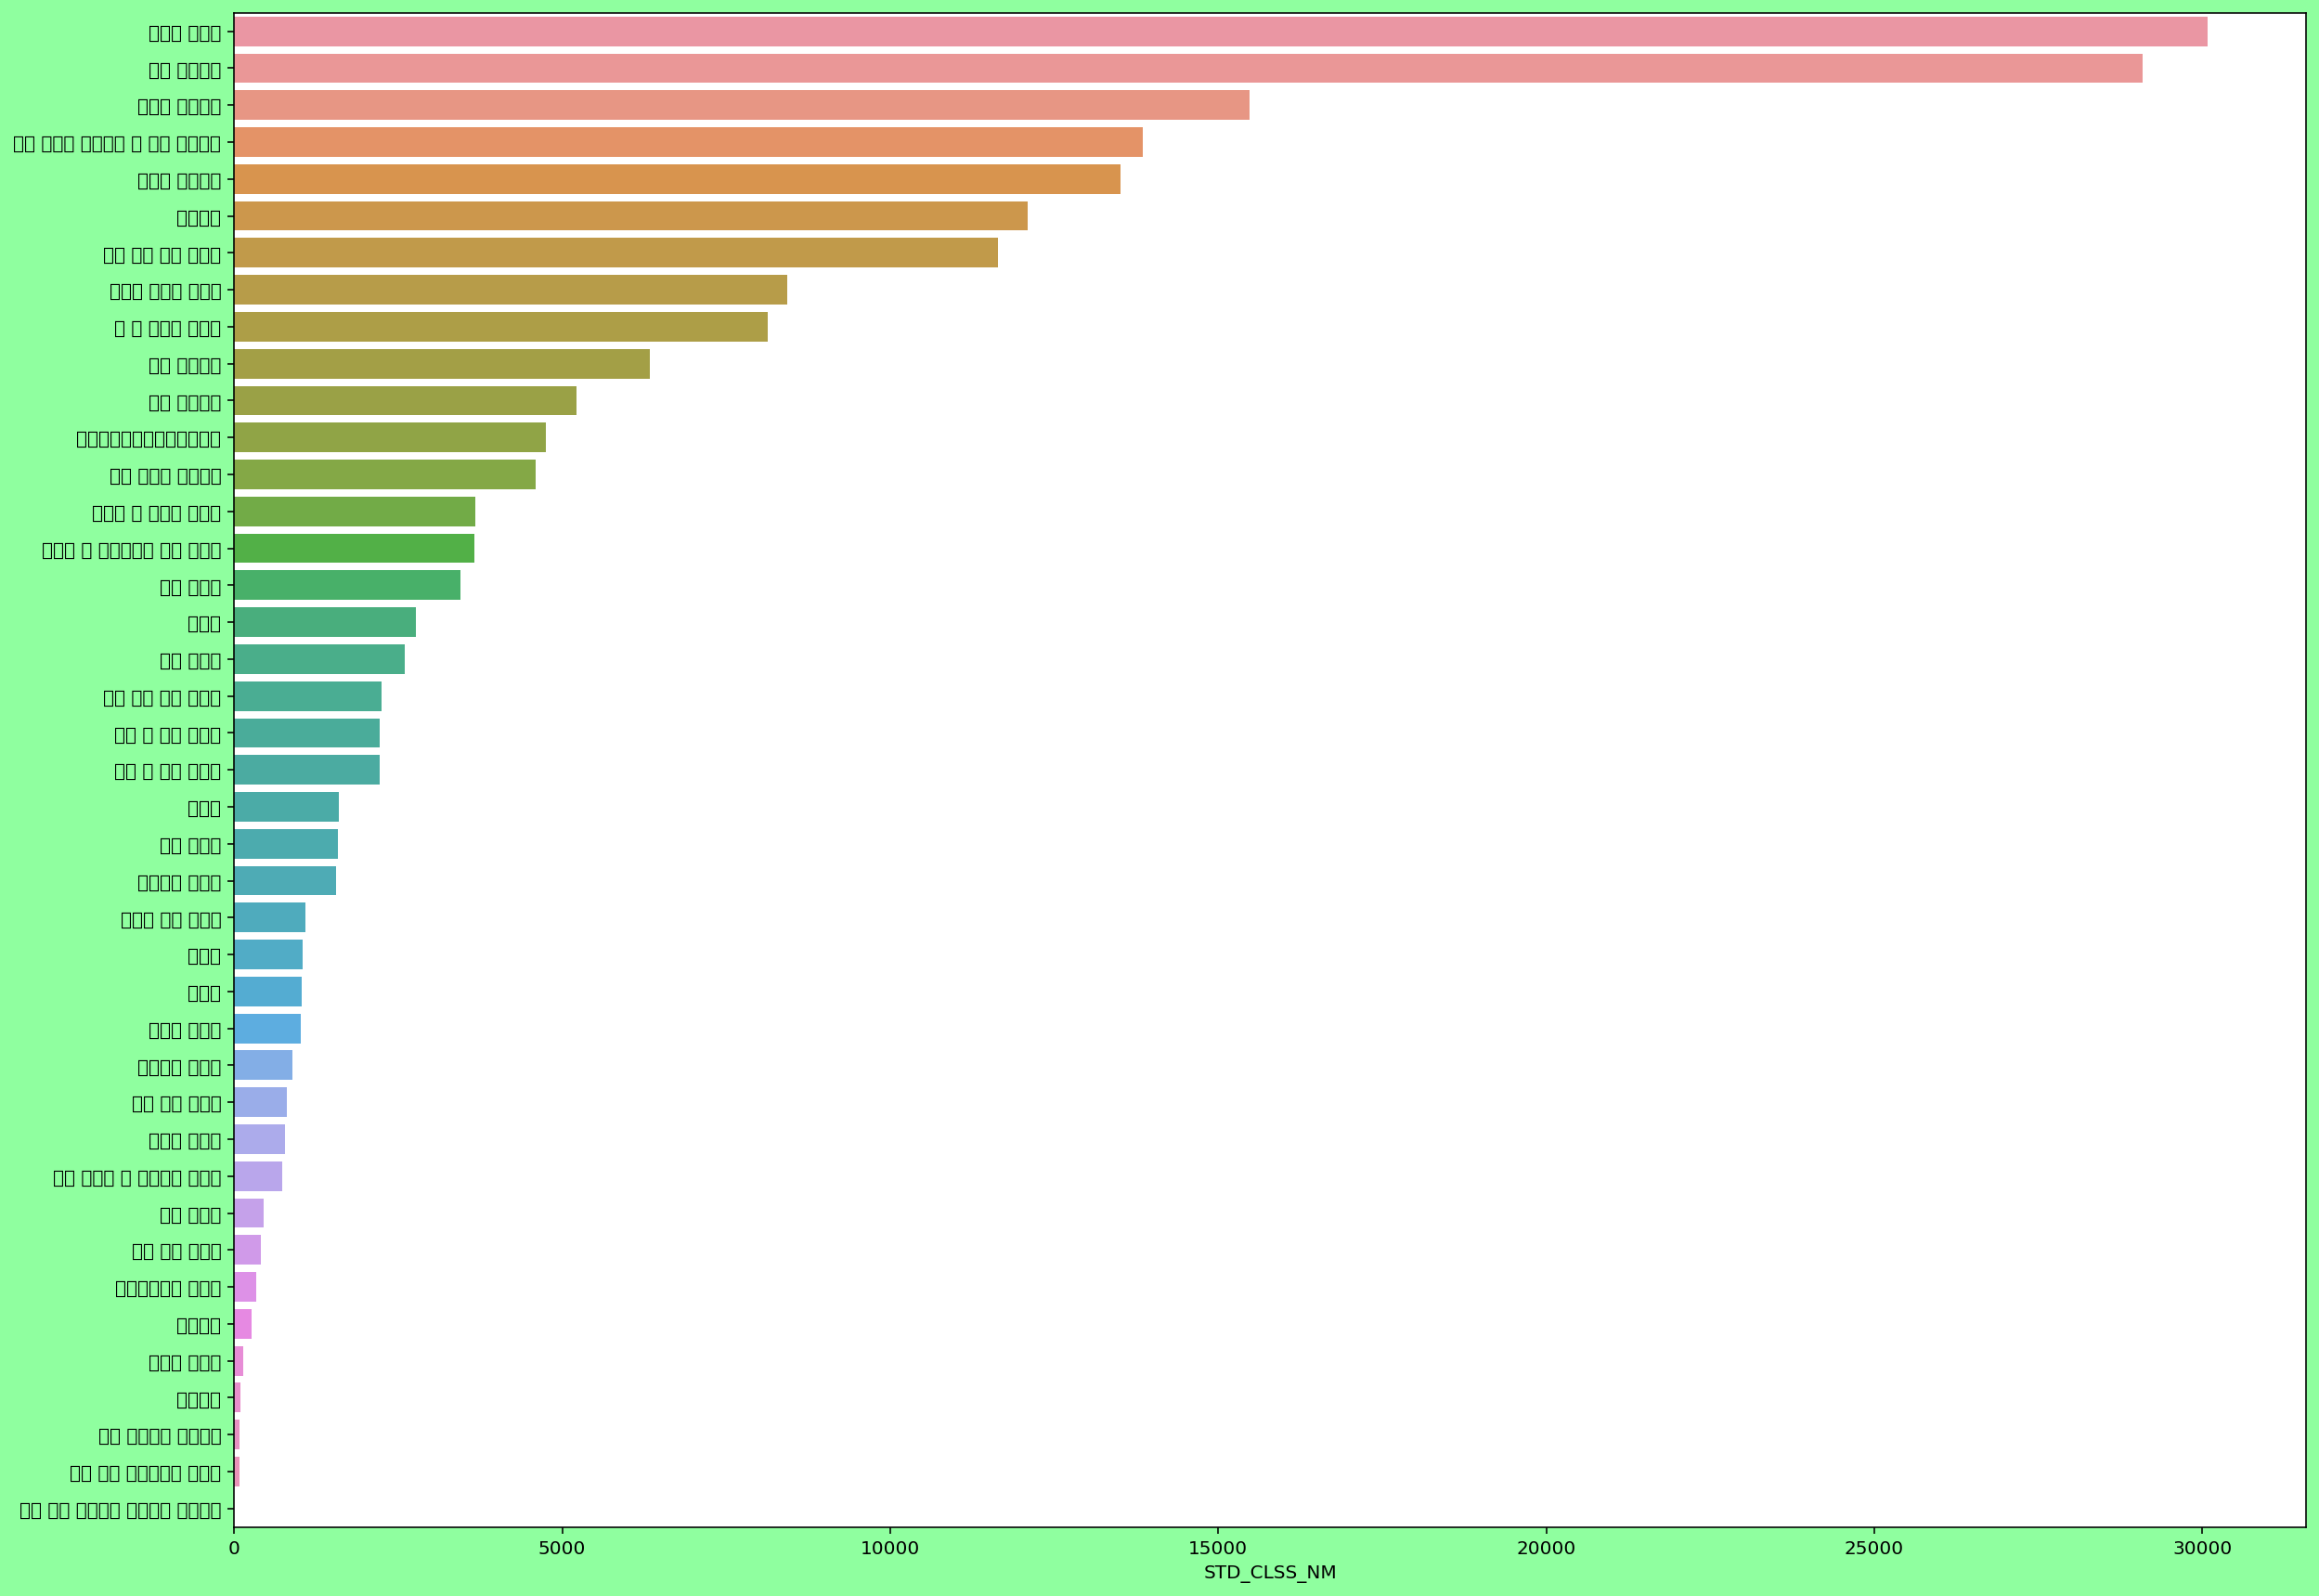

In [19]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')
plt.rc('font', family='NanumGothic') 

fig = plt.figure(figsize=(20,15))
fig.patch.set_facecolor('xkcd:mint green')

sns.barplot(y=train['STD_CLSS_NM'].value_counts().index, x=train['STD_CLSS_NM'].value_counts())

In [20]:
train['AGE'].value_counts()

20s    124474
40s     19395
30s     17241
50s     15514
10s     11086
60s      9329
70s      2961
Name: AGE, dtype: int64

In [21]:
train['SEX_CTGO_CD'].value_counts()

1    111907
2     88093
Name: SEX_CTGO_CD, dtype: int64

In [22]:
#FLC : 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
train['FLC'].value_counts()

1    113008
2     41902
4     21163
5     12290
3     11637
Name: FLC, dtype: int64

In [23]:
# 지역별 기준 시각화 

## 지역의 성격 
# 지역별 업종 분포도 
# 지역별 연령분포 
# 지역별 가구생애 주기 

## 매출액 
# 01. 지역별 매출액 
# 01-1. 지역별, 업종별 매출액 
# 02. 업종별 매출액 

In [24]:
train.columns

Index(['REG_YYMM', 'CARD_SIDO_NM', 'CARD_CCG_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM',
       'HOM_CCG_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'CSTMR_CNT', 'AMT', 'CNT'],
      dtype='object')

In [25]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import numpy as np 

In [26]:
city_sum = train.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['CNT'].sum().reset_index().sort_values('CNT',ascending=False)

In [27]:
city_sum

,CARD_SIDO_NM,STD_CLSS_NM,CNT
69,경기,체인화 편의점,4258626
249,서울,택시 운송업,2032818
32,강원,체인화 편의점,1925763
72,경기,한식 음식점업,1330418
35,강원,한식 음식점업,1119879
...,...,...,...
371,제주,그외 기타 분류안된 오락관련 서비스업,3
281,울산,일식 음식점업,3
148,대구,면세점,3
146,대구,기타 외국식 음식점업,3


In [28]:
city_sum['CARD_SIDO_NM'].unique()

array(['경기', '서울', '강원', '인천', '충남', '충북', '경북', '대전', '부산', '전북', '제주',
       '대구', '광주', '세종', '경남', '울산', '전남'], dtype=object)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


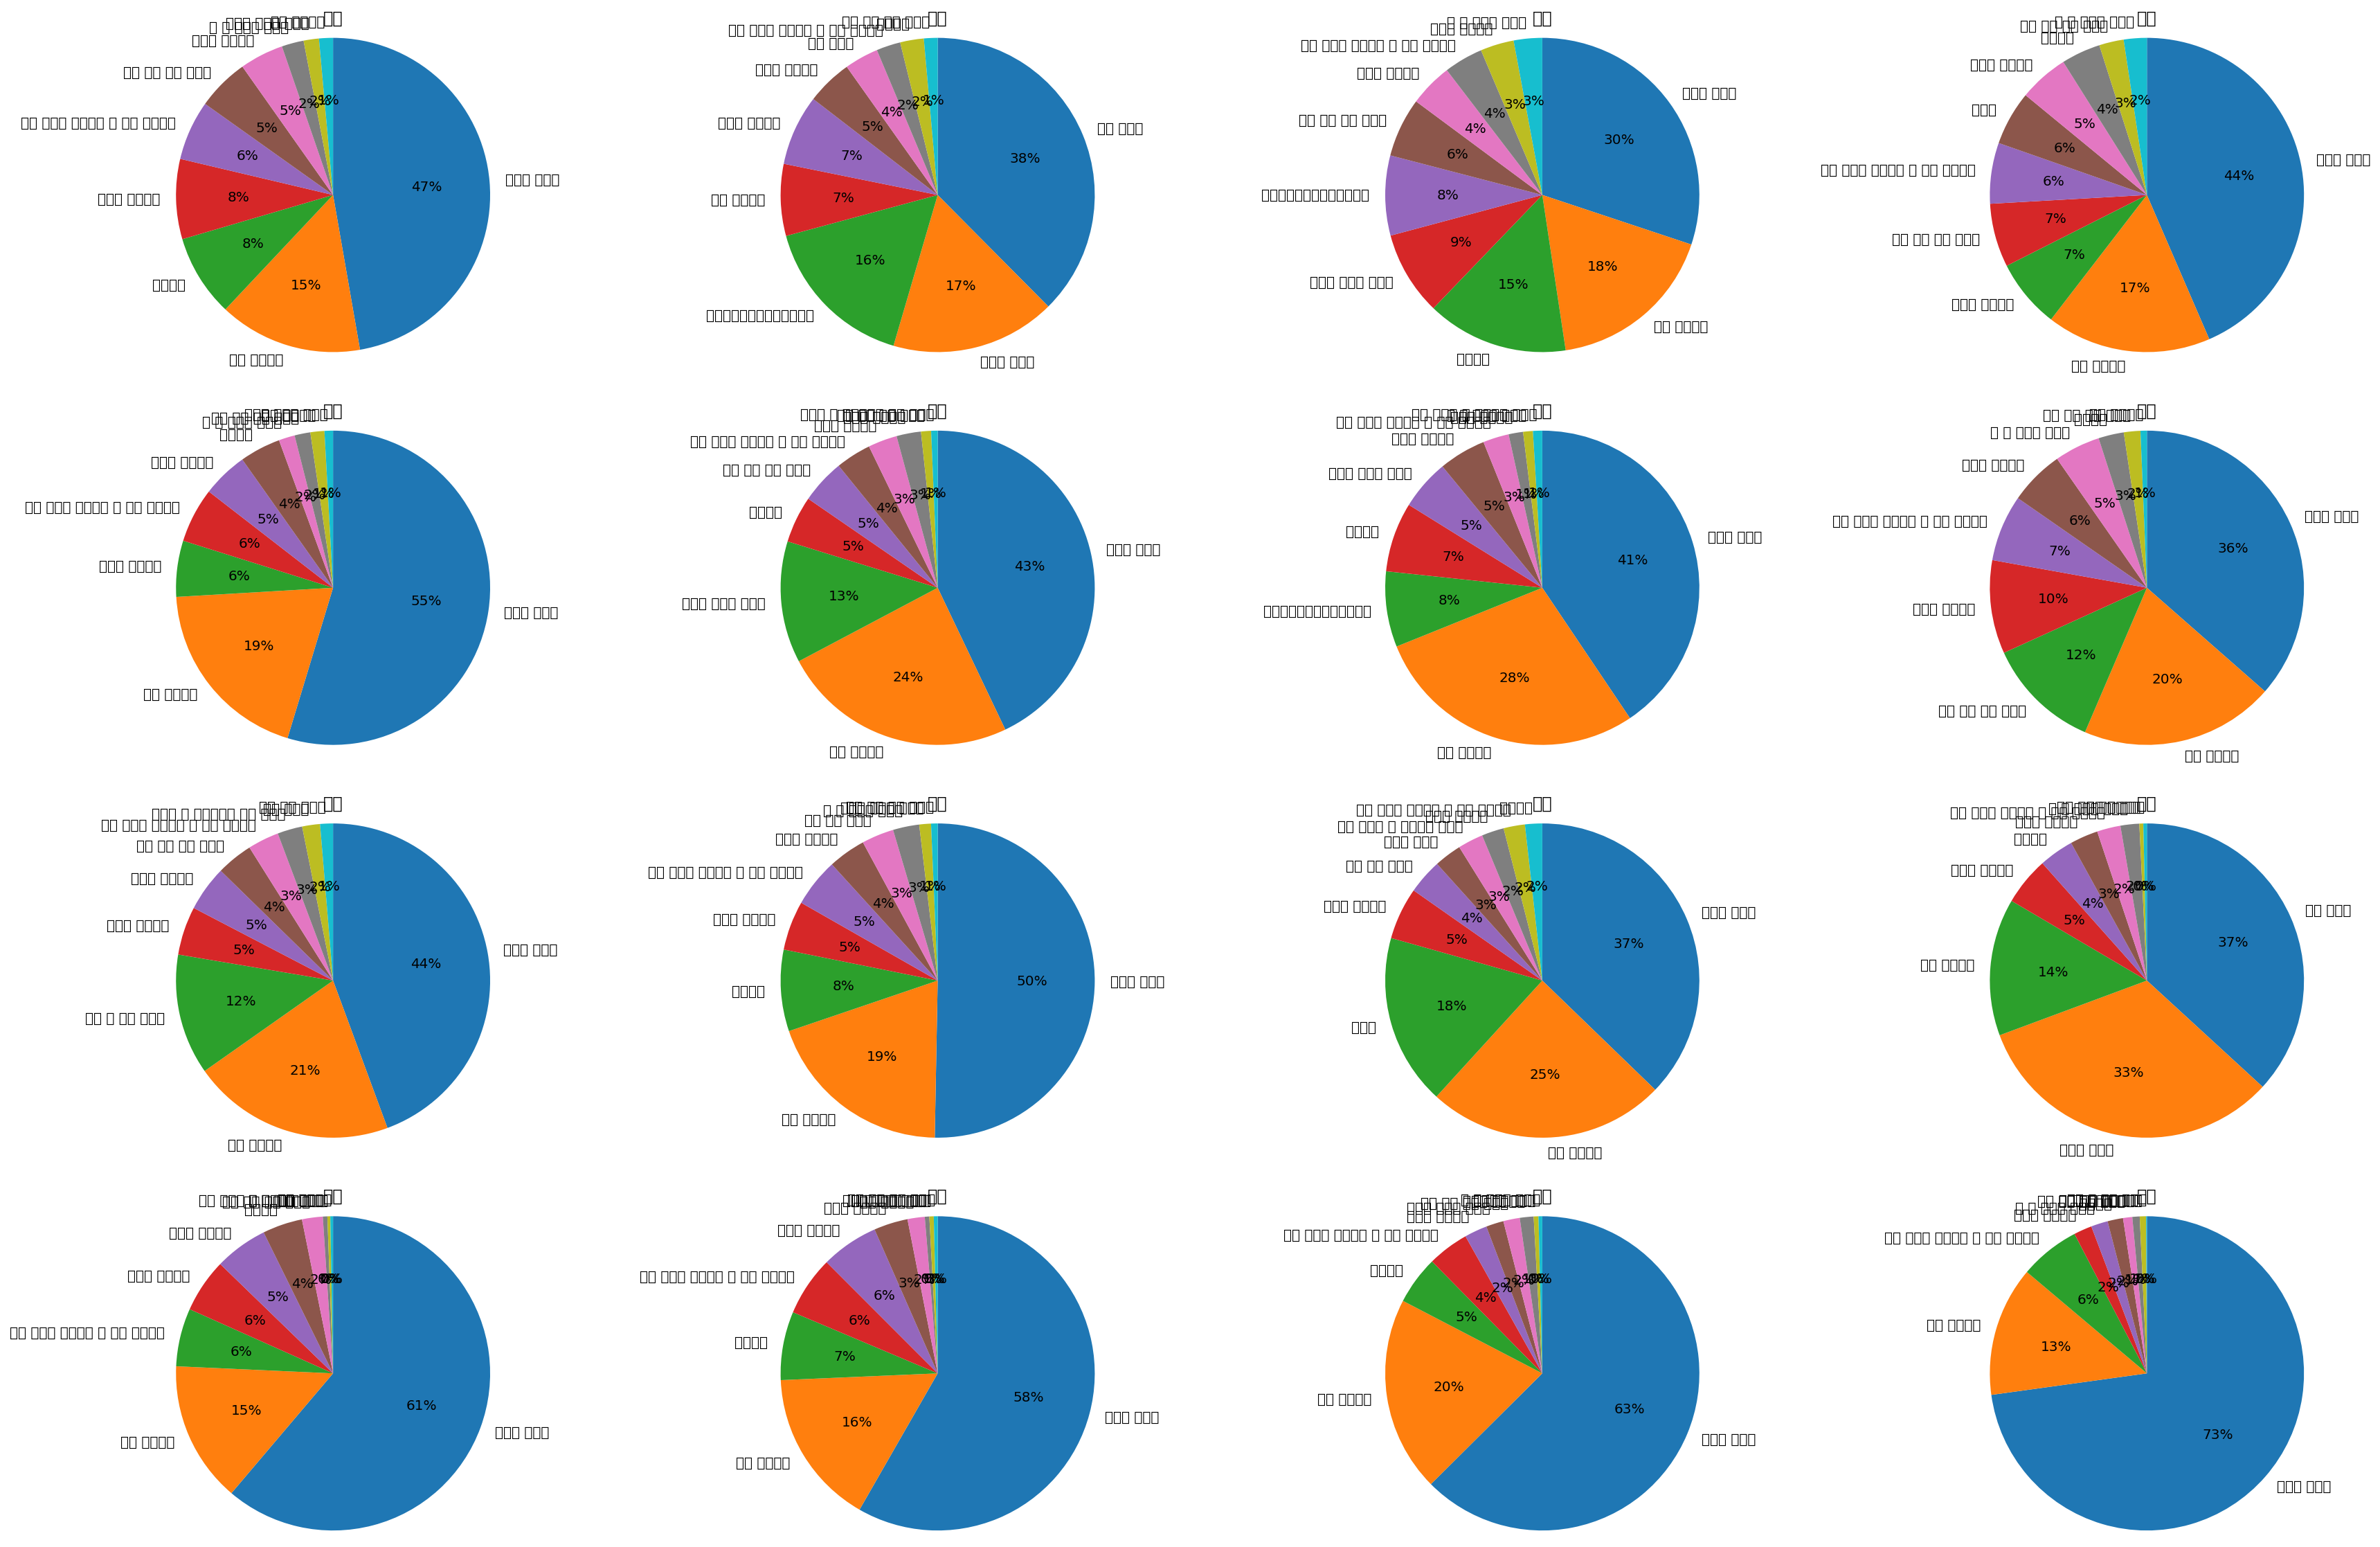

In [29]:
fig,axs = plt.subplots(4, 4)
fig.set_size_inches(30,20)
fig.patch.set_facecolor('xkcd:white')

for idx,city in enumerate(city_sum['CARD_SIDO_NM'].unique()):
  if idx <=3:
     axs[0, idx].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['CNT'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
     axs[0, idx].title.set_text(city)
  if idx > 3 and idx <=7:
     axs[1, idx-4].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['CNT'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
     axs[1, idx-4].title.set_text(city)
  if idx > 7 and idx <= 11:
     axs[2, idx-8].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['CNT'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
     axs[2, idx-8].title.set_text(city)
  if idx > 11 and idx <=15:
     axs[3, idx-12].pie(city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['CNT'],autopct='%.0f%%',
                  labels= city_sum[city_sum['CARD_SIDO_NM']==city].sort_values('CNT',ascending=False).head(10)['STD_CLSS_NM'],
                  radius= 1.2,
                  startangle=90,
                  counterclock=False)
     axs[3, idx-12].title.set_text(city)

plt.show()
        



In [30]:
# 지역별 업종 분포 코드,, 한줄로 만들어보기 

e = train[train.CARD_SIDO_NM == '강원']
f = e.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])['CNT'].sum().reset_index().sort_values('CNT',ascending=False).head(10)

f.head()



,CARD_SIDO_NM,STD_CLSS_NM,CNT
32,강원,체인화 편의점,1925763
35,강원,한식 음식점업,1119879
19,강원,슈퍼마켓,931902
31,강원,차량용 주유소 운영업,553126
10,강원,기타음식료품위주종합소매업,525487


In [31]:
# 지역별 업종 분포를 알아보기 위해서, 서울 지역의 업종 분포를 찾아보자.

b = train[train.CARD_SIDO_NM == '서울']
c = b.groupby(b['STD_CLSS_NM'])['CNT'].sum().reset_index()
d = c.sort_values('CNT', ascending=False).head(10)
d


,STD_CLSS_NM,CNT
32,택시 운송업,2032818
31,체인화 편의점,919230
9,기타음식료품위주종합소매업,879944
34,한식 음식점업,399624
13,비알콜 음료점업,393522
15,서양식 음식점업,255614
12,버스 운송업,189482
33,피자 햄버거 샌드위치 및 유사 음식점업,134393
17,슈퍼마켓,131546
6,기타 대형 종합 소매업,76343


In [32]:
label = d['STD_CLSS_NM']
counts = d['CNT']

In [33]:
plt.figure(1, figsize=(60,30))
the_grid = GridSpec(2,2)

<Figure size 4320x2160 with 0 Axes>

In [34]:
cmap = plt.get_cmap('Spectral')

In [35]:
colors = [cmap(i) for i in np.linspace(0,1,8)]

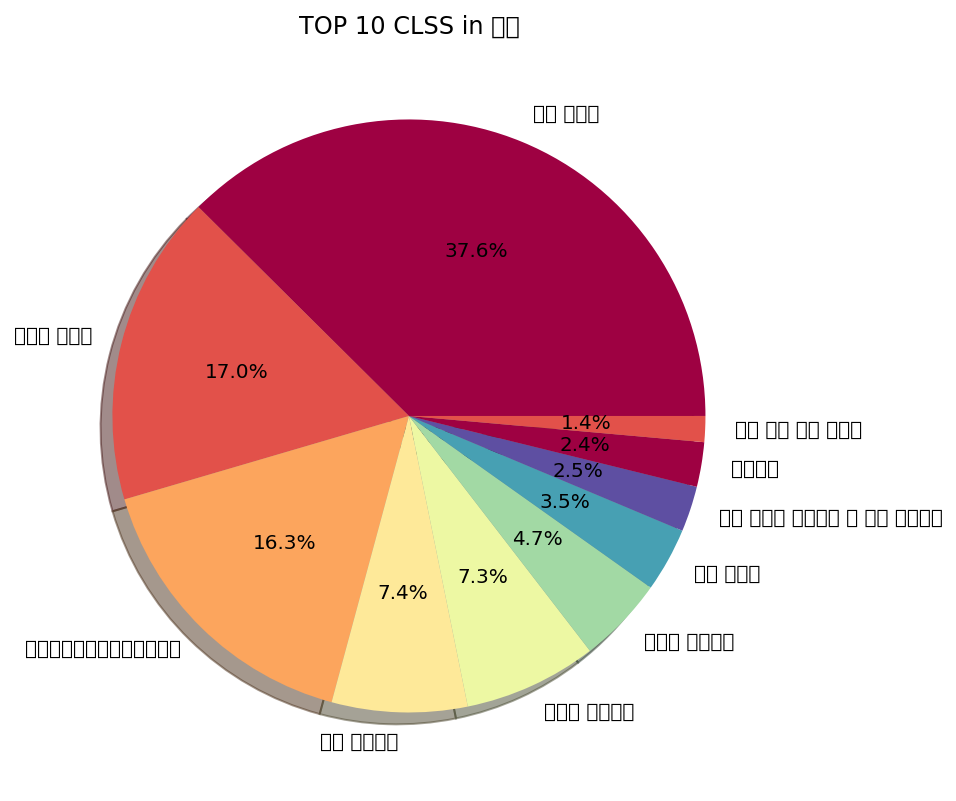

In [36]:
# 서울지역 업종분포 시각화 

plt.figure(1, figsize=(45,15))
the_grid = GridSpec(2,2)

plt.subplot(the_grid[0,1], aspect=1, title='TOP 10 CLSS in 서울')
source_pie = plt.pie(counts, labels=label, autopct='%1.1f%%', shadow=True, colors=colors)

plt.show( )

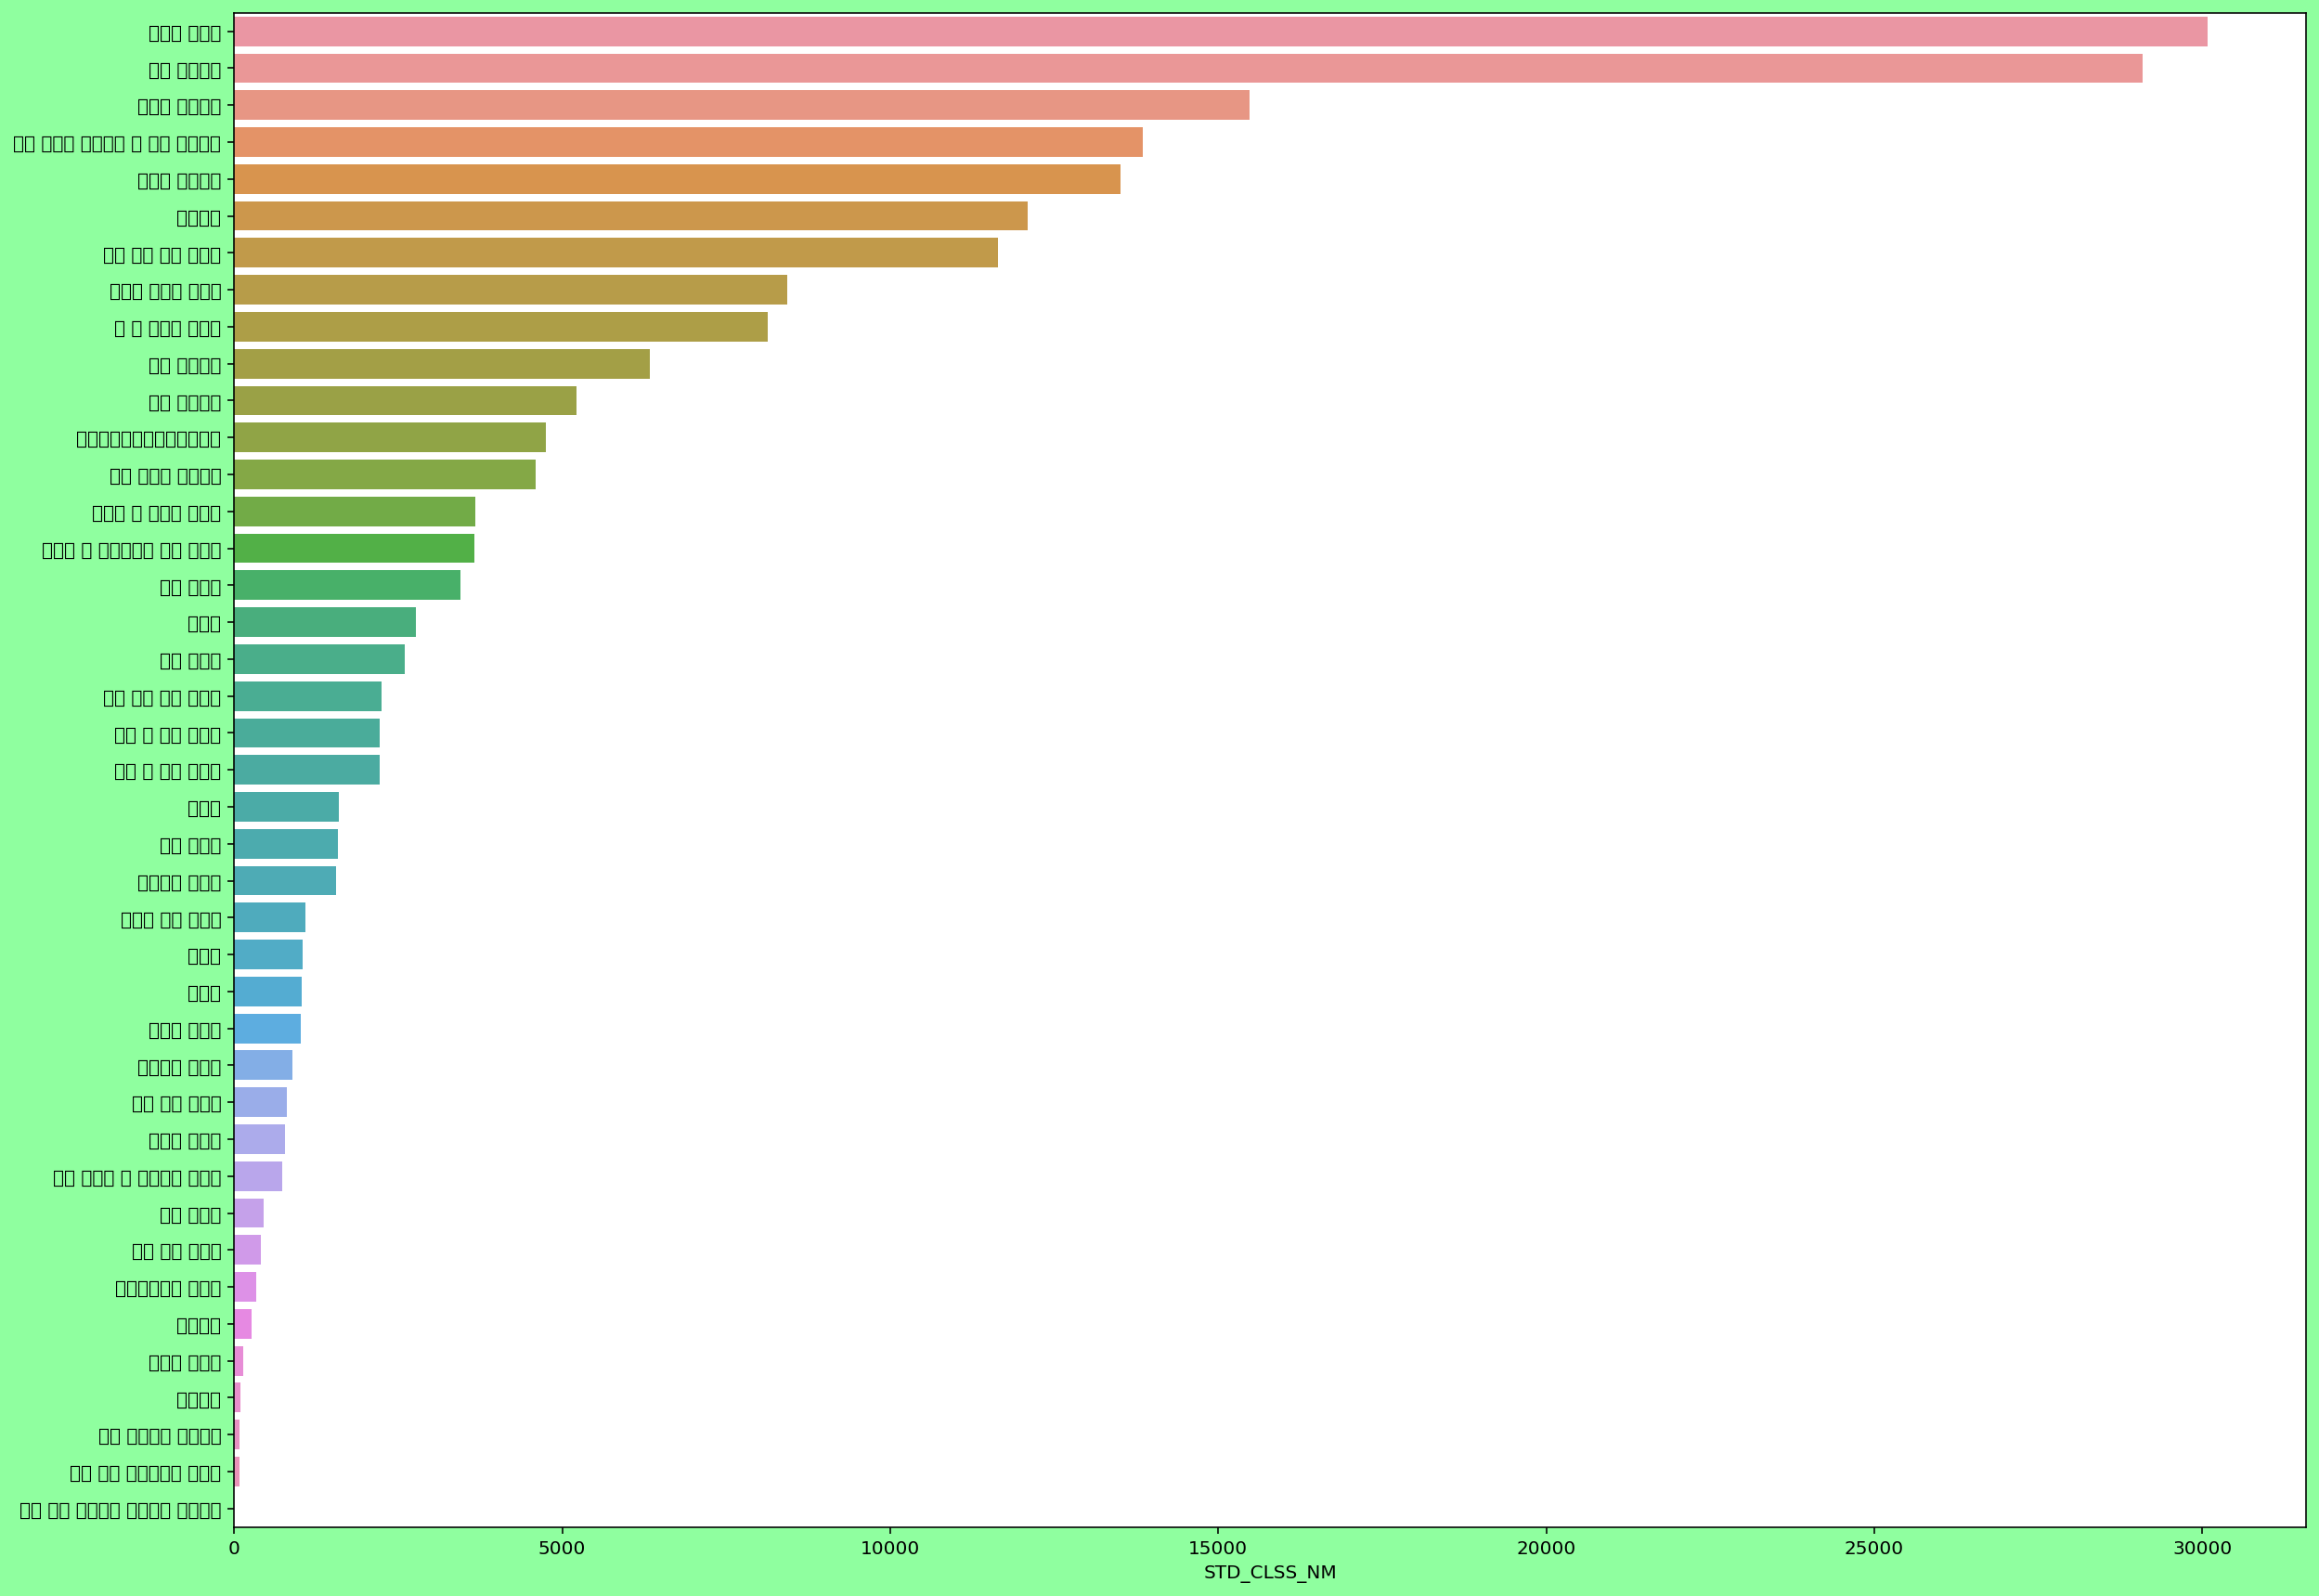

In [37]:
# 업종별 등장 빈도수 

fig = plt.figure(figsize=(20,15))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(y=train['STD_CLSS_NM'].value_counts().index, x=train['STD_CLSS_NM'].value_counts())

In [38]:
stuff = train.groupby('STD_CLSS_NM')[['CNT','CSTMR_CNT']].sum().reset_index()
stuff.head()

,STD_CLSS_NM,CNT,CSTMR_CNT
0,건강보조식품 소매업,3000,2701
1,골프장 운영업,15840,10614
2,과실 및 채소 소매업,60579,42686
3,관광 민예품 및 선물용품 소매업,5623,4257
4,그외 기타 분류안된 오락관련 서비스업,3,3


In [39]:
def make_bar(train, x_col, y_col): 
  fig = plt.figure(figsize=(14,7))
  fig.patch.set_facecolor('xkcd:white')
  sns.barplot(x=x_col, y=y_col, data = train.sort_values(x_col, ascending=False))
  plt.title(x_col)
  plt.show()

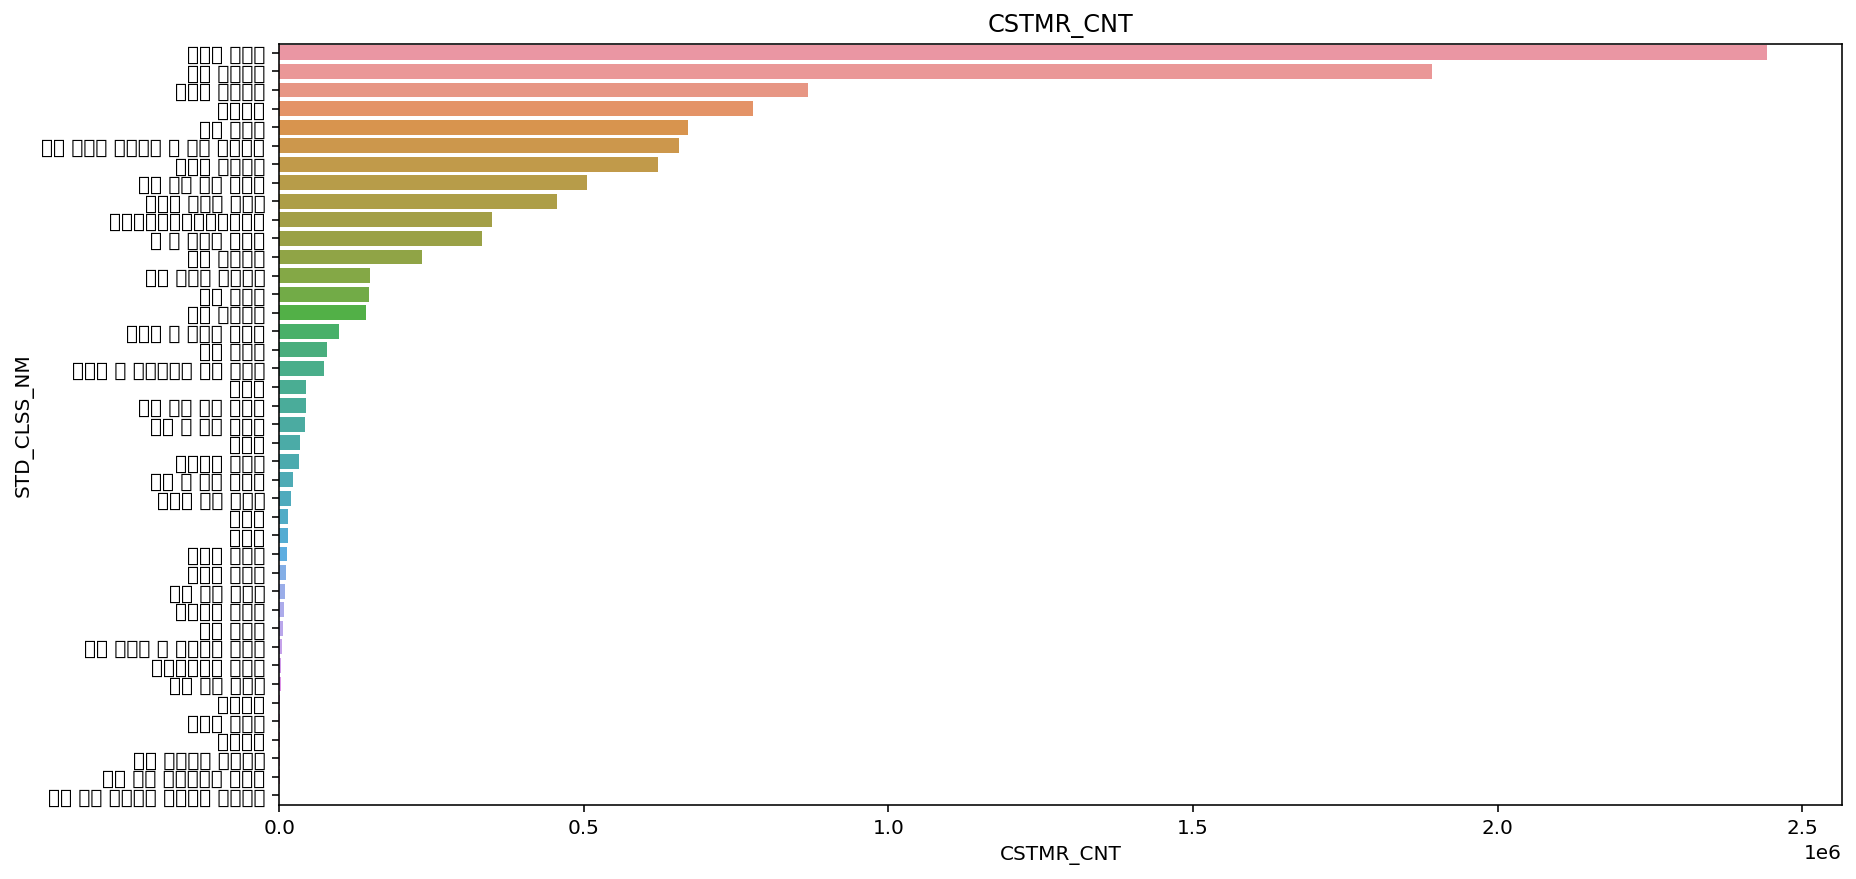

In [40]:
#이용고객수 
make_bar(stuff,'CSTMR_CNT','STD_CLSS_NM')

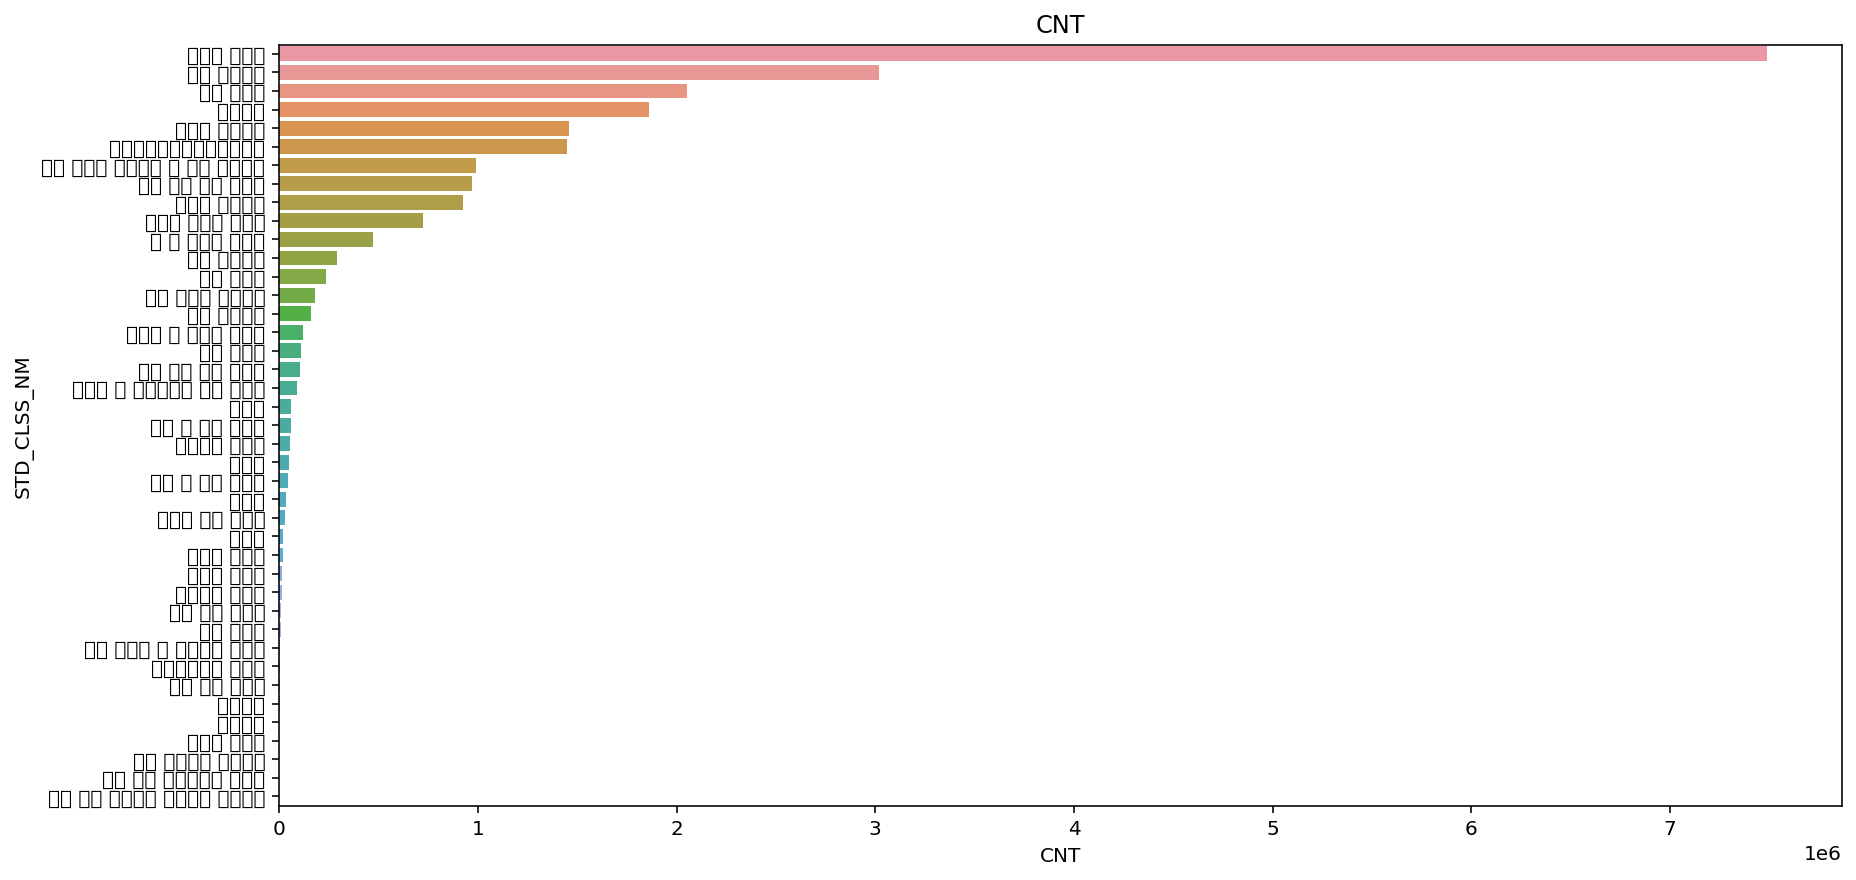

In [41]:
#이용 횟수 
make_bar(stuff,'CNT','STD_CLSS_NM')

In [42]:
train['gap'] = train['CNT'] - train['CSTMR_CNT']

In [43]:
train.loc[train['gap'] <0,'mark'] = '취소있음'
train.loc[train['gap'] ==0,'mark'] = '고객다름'
train.loc[train['gap'] >0,'mark'] = '단골있음'

In [44]:
gap=train.groupby('STD_CLSS_NM')['mark'].value_counts().reset_index(name='count')
gap.head()

,STD_CLSS_NM,mark,count
0,건강보조식품 소매업,고객다름,160
1,건강보조식품 소매업,단골있음,145
2,건강보조식품 소매업,취소있음,32
3,골프장 운영업,단골있음,567
4,골프장 운영업,고객다름,202


In [45]:
df = gap.groupby('STD_CLSS_NM')['count'].sum().reset_index()
df01 = df.merge(gap[gap['mark']=='취소있음'][['STD_CLSS_NM','count']], on='STD_CLSS_NM')

In [46]:
df01.rename(columns = {'count_x': 'total',
                       'count_y': 'cancel_count'},inplace=True)
df01.head(5)

,STD_CLSS_NM,total,cancel_count
0,건강보조식품 소매업,337,32
1,그외 기타 종합 소매업,2248,18
2,기타 대형 종합 소매업,11646,10
3,기타 외국식 음식점업,4599,29
4,기타 주점업,454,1


In [47]:
df01['rate'] = df01['cancel_count']/df01['total']
df01 = df01.sort_values('rate',ascending=False, ignore_index=True)
df01.head()

,STD_CLSS_NM,total,cancel_count,rate
0,정기 항공 운송업,800,296,0.370000
1,건강보조식품 소매업,337,32,0.094955
2,여행사업,266,16,0.060150
3,내항 여객 운송업,402,15,0.037313
4,스포츠 및 레크레이션 용품 임대업,3656,97,0.026532


In [48]:
df02 = train.groupby(['CARD_SIDO_NM','STD_CLSS_NM'])[['CSTMR_CNT','CNT']].sum().reset_index()
df02.head()

,CARD_SIDO_NM,STD_CLSS_NM,CSTMR_CNT,CNT
0,강원,건강보조식품 소매업,1899,1991
1,강원,골프장 운영업,9538,14372
2,강원,과실 및 채소 소매업,27228,39038
3,강원,관광 민예품 및 선물용품 소매업,1011,1201
4,강원,그외 기타 스포츠시설 운영업,240,365


In [49]:
df02[df02['CSTMR_CNT']>df02['CNT']]

,CARD_SIDO_NM,STD_CLSS_NM,CSTMR_CNT,CNT
244,서울,정기 항공 운송업,6381,6370
309,인천,정기 항공 운송업,165,160
359,전북,정기 항공 운송업,1187,1130
389,제주,정기 항공 운송업,1415,1400
420,충남,정기 항공 운송업,25,24


In [50]:
# 월별로 이용고객의 추이를 확인할 필요가 있음. 

In [51]:
#날짜별 이용 건수 

In [52]:
df03 = train.groupby('REG_YYMM')[['CSTMR_CNT','CNT']].sum().reset_index()
df03.tail()

,REG_YYMM,CSTMR_CNT,CNT
10,201911,477396,1035081
11,201912,524589,1113680
12,202001,439522,890708
13,202002,405096,901037
14,202003,278630,601306


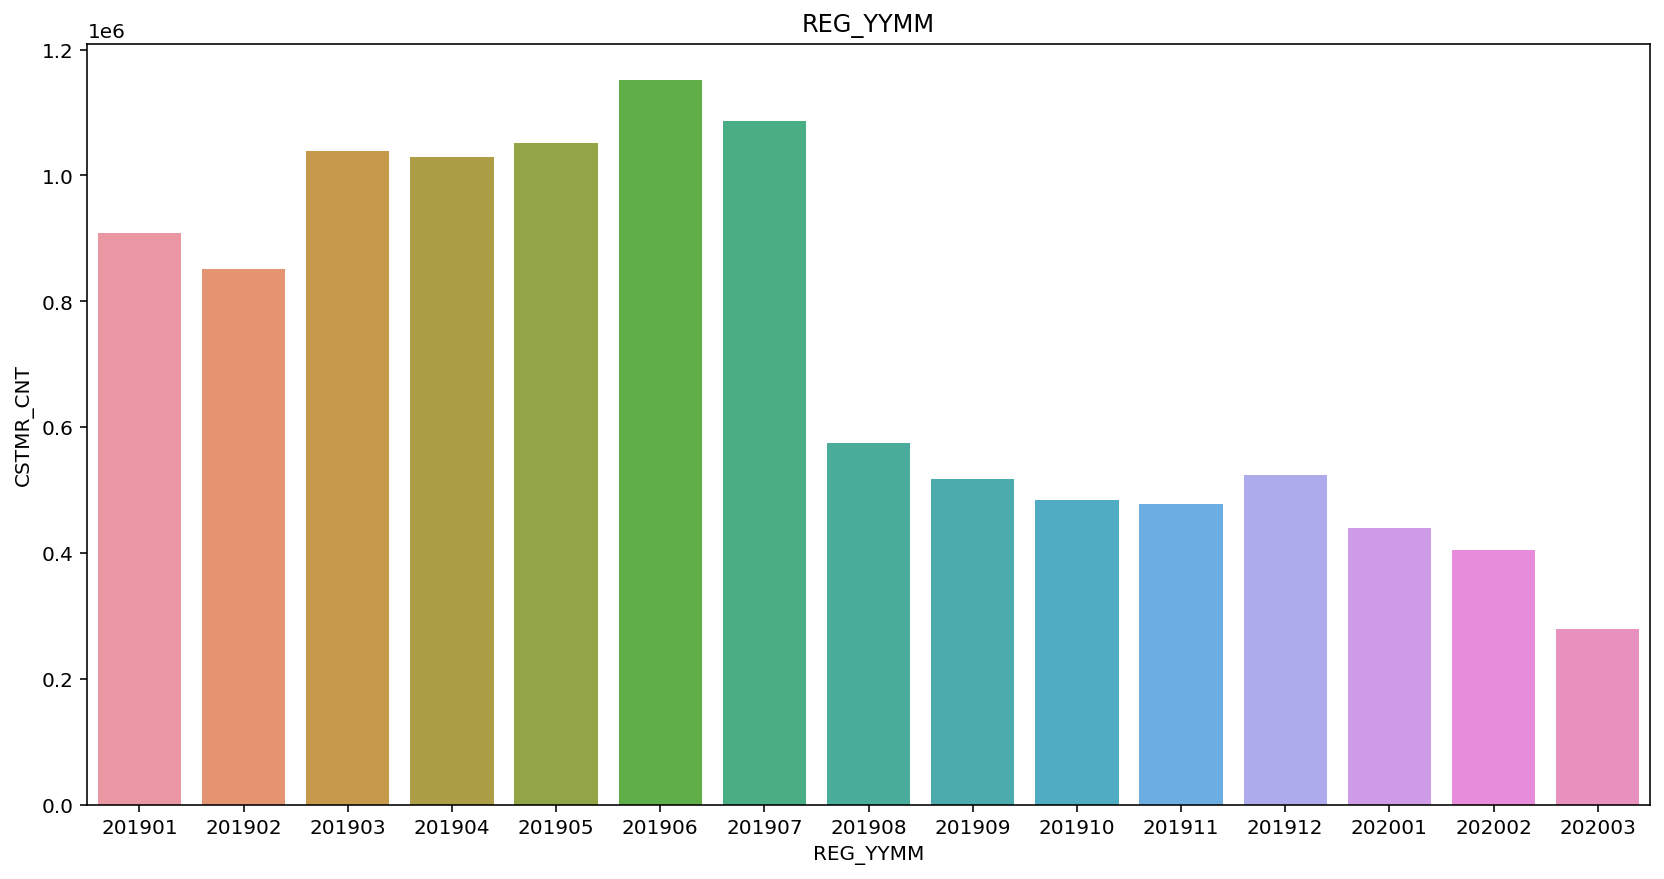

In [53]:
make_bar(df03, 'REG_YYMM', 'CSTMR_CNT')

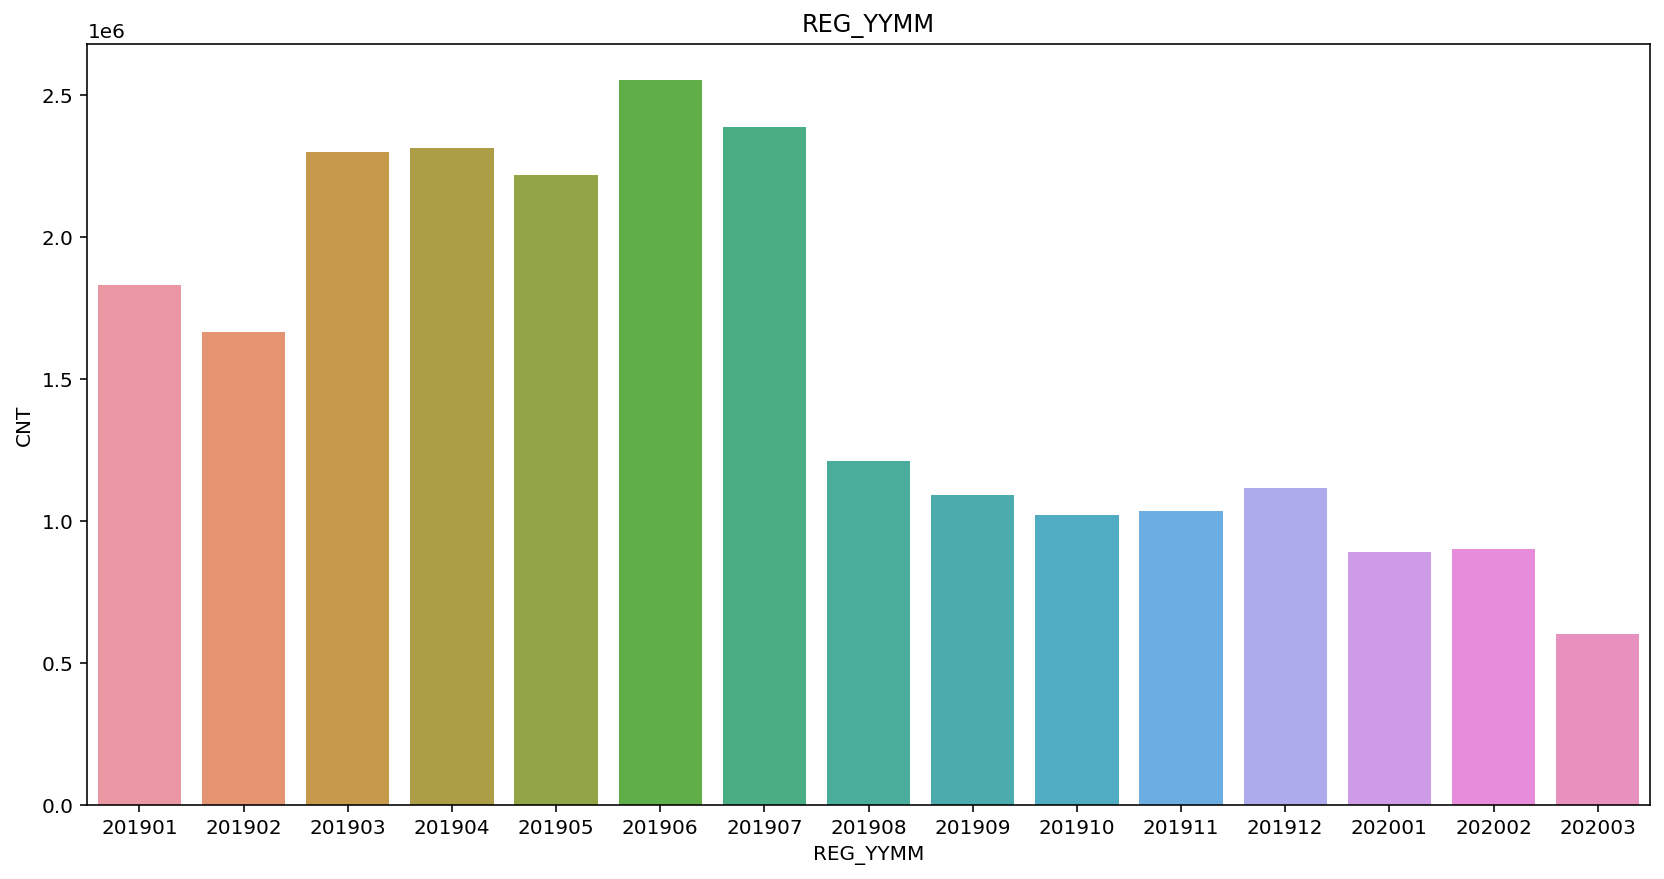

In [54]:
make_bar(df03, 'REG_YYMM', 'CNT')

In [55]:
train.tail()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,gap,mark
199995,201908,전북,군산시,빵 및 과자류 소매업,경기,고양시 일산서구,20s,1,1,4,68900,11,7,단골있음
199996,201908,전북,군산시,정기 항공 운송업,경기,고양시 덕양구,20s,2,1,18,1487404,18,0,고객다름
199997,201908,전북,군산시,정기 항공 운송업,경기,성남시 수정구,20s,2,1,12,352900,9,-3,취소있음
199998,201908,전북,전주시 완산구,서양식 음식점업,경기,안산시 상록구,20s,2,1,4,76900,4,0,고객다름
199999,201908,전북,전주시 완산구,한식 음식점업,경기,용인시 수지구,20s,2,1,41,596900,51,10,단골있음


In [56]:
df03['REG_YYMM'].unique()

array([201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908,
       201909, 201910, 201911, 201912, 202001, 202002, 202003])

In [57]:
submission.tail()

,id,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
1389,1316,202007,충남,그외 기타 분류안된 오락관련 서비스업,0.0
1390,1317,202007,충남,그외 기타 스포츠시설 운영업,0.0
1391,1353,202007,충북,건강보조식품 소매업,0.0
1392,1357,202007,충북,그외 기타 분류안된 오락관련 서비스업,0.0
1393,1358,202007,충북,그외 기타 스포츠시설 운영업,0.0


In [58]:
import os
for dirname, _, filenames in os.walk('E:\\Eric_Github\\Dacon\\data_jeju'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [60]:
#train.groupby(['confirmed_date','patient_id'])['STD_CLSS_NM'].value_counts().reset_index(name='count')

#train.groupby(['confirmed_date','patient_id'])['STD_CLSS_NM'].value_counts().reset_index(name='count')

a002 = P001.groupby('confirmed_date')['confirmed_date','patient_id','province']
a003 = P001.groupby(['confirmed_date','patient_id'])
a004 = P001.groupby(['confirmed_date','patient_id'])['province']

In [61]:
P001.tail()

,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
5160,7000000015,female,30s,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,25,NaN,2020-05-30,2020-06-13,NaN,released
5161,7000000016,NaN,NaN,Korea,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-16,2020-06-24,NaN,released
5162,7000000017,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,72,NaN,2020-06-18,NaN,NaN,isolated
5163,7000000018,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated
5164,7000000019,NaN,NaN,Bangladesh,Jeju-do,Jeju-do,overseas inflow,NaN,NaN,NaN,2020-06-18,NaN,NaN,isolated


In [62]:
day_list = P001['confirmed_date'].unique()
day_list = list(day_list)
len(day_list)

149

In [63]:
a006 = P001[P001['confirmed_date']=='2020-06-08']['patient_id'].value_counts().sum()

In [64]:
print(a005)
# dict 형태로, day_list + a005 

NameError: ignored

In [ ]:
print(b)

In [ ]:
# dict 형태로 변환 

list_C = [ x for x in zip(day_list,b) ]
list_D = pd.DataFrame(list_C)

list_D

In [ ]:
list_D.columns =["confirmed_date","total_paitient"]
list_D



In [ ]:
#각 날짜별, 지역별로 환자가 몇 명 있었는지 구하여라
b =[]
for date in day_list:
  a005 = P001[P001['confirmed_date']==date]['patient_id'].value_counts().sum()
  b.append(a005)
  #print(a005)

#a006 = P001[P001['confirmed_date']=='2020-06-08']['patient_id'].value_counts().sum()


In [ ]:
#서울지역 정보 
S001 = P001[P001['province']=='Seoul']

P001['province'].unique()
#17개 시,도

In [ ]:
S001.tail()

In [65]:
#서울 지역에 있는 환자 숫자 총합 구하기 
a =[]
for date in day_list:
  s001 = S001[S001['confirmed_date']==date]['patient_id'].value_counts().sum()
  a.append(s001)
  #print(a005)

#a006 = P001[P001['confirmed_date']=='2020-06-08']['patient_id'].value_counts().sum()


NameError: ignored

In [ ]:
#dict 형태로 변환 

list_A = [ x for x in zip(day_list,a) ]
list_A = pd.DataFrame(list_A)
list_A.columns =["confirmed_date","total_patient"]
list_A

#그다음에 할꺼.. 흠.. 
#confirmed_date 월별로 나눈 다음에.. 월별 total_patient 합계 구하고.. REG_YYMM 형태로(201901) 만들어서, train 데이터에 merge 시키기. 
#시키고 나서 모델 돌리고, rmse 낮아졌나 안 낮아졌나 확인해보기 ~ 

list_A


In [ ]:
train.head()

In [66]:
# for date in day_list:
#   print(date)

a006=P001[P001['confirmed_date']=='2020-01-30']['patient_id'].value_counts().sum()

a006

4

In [67]:
a002.head()

,confirmed_date,patient_id,province
0,2020-01-23,1000000001,Seoul
1,2020-01-30,1000000002,Seoul
2,2020-01-30,1000000003,Seoul
3,2020-01-30,1000000004,Seoul
4,2020-01-31,1000000005,Seoul
...,...,...,...
4730,NaN,6011000051,Gyeongsangbuk-do
4731,NaN,6011000052,Gyeongsangbuk-do
4732,NaN,6011000053,Gyeongsangbuk-do
4817,2020-04-18,6016000039,Gyeongsangbuk-do


In [68]:
#P001= pd.read_csv('/content/drive/My Drive/Data_Corona/PatientInfo.csv')

a002 = P001.groupby('confirmed_date')['confirmed_date','patient_id','province']
a002.tail()

,confirmed_date,patient_id,province
0,2020-01-23,1000000001,Seoul
1,2020-01-30,1000000002,Seoul
2,2020-01-30,1000000003,Seoul
3,2020-01-30,1000000004,Seoul
4,2020-01-31,1000000005,Seoul
...,...,...,...
5160,2020-05-30,7000000015,Jeju-do
5161,2020-06-16,7000000016,Jeju-do
5162,2020-06-18,7000000017,Jeju-do
5163,2020-06-18,7000000018,Jeju-do


In [69]:
train.tail()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,gap,mark
199995,201908,전북,군산시,빵 및 과자류 소매업,경기,고양시 일산서구,20s,1,1,4,68900,11,7,단골있음
199996,201908,전북,군산시,정기 항공 운송업,경기,고양시 덕양구,20s,2,1,18,1487404,18,0,고객다름
199997,201908,전북,군산시,정기 항공 운송업,경기,성남시 수정구,20s,2,1,12,352900,9,-3,취소있음
199998,201908,전북,전주시 완산구,서양식 음식점업,경기,안산시 상록구,20s,2,1,4,76900,4,0,고객다름
199999,201908,전북,전주시 완산구,한식 음식점업,경기,용인시 수지구,20s,2,1,41,596900,51,10,단골있음


In [71]:
# patient_id 의 숫자를 합한다. 

#새로운 행 만들기 patient_count_sum 

#a002.value_counts("confirmed_date").head()

#df['species'].nunique()

a002["confirmed_date"].unique()

IndexError: ignored